## ROB537: Homework 1

### Nathan Butler | butlnath@oregonstate.edu

Implement a one hidden-layer feed forward neural network to classify products into “pass” or “fail” categories. The neural network classifier will assume the role of quality control for a manufacturing plant. We use a simplified dataset for this assignment.

Each file has 400 data points, with one data point on each line where the data points have five inputs (x1, x2, x3, x4,x5) and two outputs (y1, y2):

x1, x2, x3, x4, x5, y1, y2

In this case, (x1, x2, x3, x4, x5) are features of products, such as specifications for dimensions, weight, and functionality. These features have been quantified by the values x1 through x5. The values y1 and y2 denote the classification of the product (pass or fail ), where (y1 = 0, y2 = 1) indicates the product has passed, and (y1 = 1, y2 = 0) indicates the product has failed.

- train1.csv contains 400 training patterns (200 pass and 200 fail) from a simple power plant

- train2.csv contains 400 training patterns (200 pass and 200 fail) from a more complex power plant

- test1.csv and test2.csv are data sets to verify the accuracy of your models for the two power plants

Use the gradient descent algorithm to train a five input, two output (one for each class) neural network using file train1.csv. Write a report addressing the following questions (you should run experiments to support each of your answers):

1. Describe the training performance of the network:

How does the number of hidden units impact the results?
How does the training time impact the results?
How does the learning rate impact the results?
What other critical parameters impacted the results?
Note, this is a classification problem, meaning that each data pattern (x1, x2, x3, x4, x5) belongs to one of two classes (y1 or y2). Consequently, use correct classification percentage (instead of MSE) to report your results. You will still use MSE to train the neural networks; you will simply report the classification percentage (or classification error) to assess the performance of the neural networks.

2. Use train2.csv to train another neural network. Answer questions 1.1-1.4 from above for the test set. What conclusions can you draw from your results? What do you think is causing the difference in performance? 

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import random

### Data Loader

In [254]:
def load_data(path):
    data = pd.read_csv(path)

    x = data.iloc[:,[0,1,2,3,4]] # first 5 columns of csv as input
    x = np.array(x)
    y = data.iloc[:,[5,6]]       # last 2 as output
    y = np.array(y)

    return x, y

x,y = load_data("train1.csv") # function call

print(x[0], "\n", y[0])

[-1.4390433  -0.06364541  0.68397101  0.89095435  1.69263034] 
 [1. 0.]


### Define Model

Setup for Tools & Helpers



In [255]:
# Reference resource: https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/


# activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

# derivative for backprop
def sigmoid_prime(x):
    # print("sig'(x): ", np.multiply(sigmoid(x), (1-sigmoid(x))).shape)
    return np.multiply(sigmoid(x), (1-sigmoid(x)))

# feed forward network
def feedForward(x,w1,w2,b1,b2):
    
    # hidden layer
    z1 = x.dot(w1) + b1 # input from layer 1
    a1 = sigmoid(z1) # output from hidden layer

    # output layer
    z2 = a1.dot(w2) + b2 # input from hidden layer
    a2 = sigmoid(z2) # output from output layer

    return a2

# mse loss
def loss_mse(out, Y):
    s = np.square(out-Y)
    out = np.sum(s)/len(Y)

    return out


### Training Definition

In [317]:
# random initialization of weights
def generate_weights(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
        
    return np.array(l).reshape(x,y)

# random initialization of biases
def generate_biases(x):
    l=[]
    for i in range(x):
        l.append(np.random.randn())
        
    return np.array(l).reshape(x)

# backpropegation
def backpropegation(x,y,w1,w2,b1,b2,alpha):

    # hidden layer
    z1 = x.dot(w1) + b1 # input from layer 1
    a1 = sigmoid(z1) # output from hidden layer

    # output layer
    z2 = a1.dot(w2) + b2 # input from hidden layer
    a2 = sigmoid(z2) # output from output layer
    
    # errors
    output_grad = a2-y
    dE2 = output_grad  # last layer error
    dE1 = np.multiply((w2.dot((dE2.transpose()))).transpose(), sigmoid_prime(a1)) # hidden layer error
    
    # determine gradients (dE/dw, dE/db)
    w2_adj = a1.reshape(-1,1).dot(dE2.reshape(-1,1).transpose())
    w1_adj = x.reshape(-1,1).dot(dE1.reshape(-1,1).transpose())
    b2_adj = dE2
    b1_adj = dE1

    # update parameters with step size
    w2 = w2 - (alpha * w2_adj)
    b2 = b2 - (alpha * b2_adj)
    w1 = w1 - (alpha * w1_adj)
    b1 = b1 - (alpha * b1_adj)


    return (w1,w2,b1,b2)

# training
def train(x, Y, w1, w2, b1, b2, alpha = 0.01, epoch = 10):
    acc = []
    loss1 = []
    total = len(x)

    for j in range(epoch): #for each epoch
        l = []
        correct = 0
        for i in range(len(x)): # for each datapoint
            out = feedForward(x[i], w1, w2, b1, b2)

            #pass/fail categories
            out_pass = [0,1]
            out_fail = [1,0]

            # classification based on output
            if out[0] < out[1]:
                classif = out_pass
            else:
                classif = out_fail
            
            #enumerate correct outputs
            if classif[0] == Y[i][0]:
                correct += 1

            l.append(loss_mse(out, Y[i]))
            
            w1,w2,b1,b2 = backpropegation(x[i],y[i],w1,w2,b1,b2,alpha)

            temp_acc = (correct/total)*100

        if (j % 25 == 0): print("epochs: ", j, "======= acc: ", temp_acc)
        
        acc.append(temp_acc)
        loss1.append(sum(l)/len(x))

    return (acc, loss1, w1, w2, b1, b2)

### Training

epochs:  0 ======= acc:  49.87468671679198
epochs:  25 ======= acc:  77.19298245614034
epochs:  50 ======= acc:  70.67669172932331
epochs:  75 ======= acc:  67.41854636591479


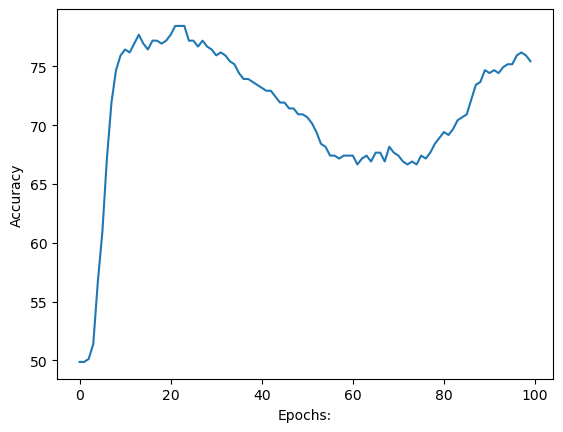

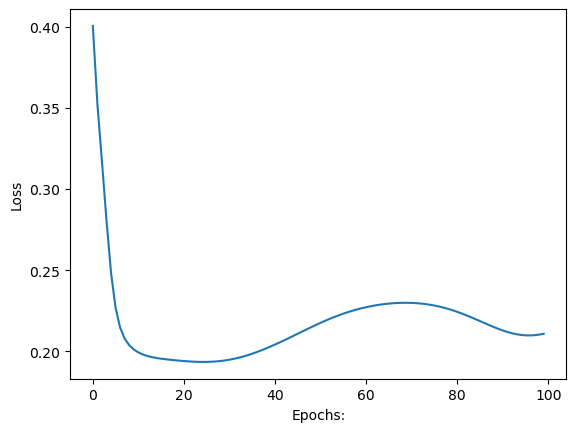

In [318]:
# initialize network
w1 = generate_weights(5, 10)
b1 = generate_biases(10)
w2 = generate_weights(10, 2)
b2 = generate_biases(2)

STEP_SIZE = 0.001
EPOCH = 100

# do training
acc, loss1, w1, w2, b1, b2 = train(x, y, w1, w2, b1, b2, STEP_SIZE, EPOCH)

# plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()
 
# plotting Loss
plt.plot(loss1)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

### Validation

In [336]:
x,Y = load_data("test1.csv") # load test data


def test(x,Y,w1,w2,b1,b2):
    out = feedForward(x,w1,w2,b1,b2)
    total = len(x)
    correct = 0
    for i in range(len(x)): # for each datapoint
        out = feedForward(x[i], w1, w2, b1, b2)

        #pass/fail categories
        out_pass = [0,1]
        out_fail = [1,0]

        # classification based on output
        if out[0] < out[1]:
            classif = out_pass
        else:
            classif = out_fail
            
        #enumerate correct outputs
        if classif[0] == Y[i][0]:
            correct += 1

    acc = (correct/total)*100
    
    return acc

Automated Testing

Training on  train2.csv  and testing with  test2.csv
Hidden Units:  50  | STEP SIZE:  0.001  | EPOCHS:  1000
epochs:  0 ======= acc:  49.87468671679198
epochs:  25 ======= acc:  52.38095238095239
epochs:  50 ======= acc:  54.385964912280706
epochs:  75 ======= acc:  54.385964912280706
epochs:  100 ======= acc:  54.13533834586466
epochs:  125 ======= acc:  53.88471177944862
epochs:  150 ======= acc:  54.13533834586466
epochs:  175 ======= acc:  55.388471177944865
epochs:  200 ======= acc:  56.89223057644111
epochs:  225 ======= acc:  56.64160401002506
epochs:  250 ======= acc:  57.64411027568922
epochs:  275 ======= acc:  56.89223057644111
epochs:  300 ======= acc:  56.89223057644111
epochs:  325 ======= acc:  57.64411027568922
epochs:  350 ======= acc:  58.1453634085213
epochs:  375 ======= acc:  57.89473684210527
epochs:  400 ======= acc:  58.39598997493734
epochs:  425 ======= acc:  59.14786967418546
epochs:  450 ======= acc:  59.3984962406015
epochs:  475 ======= acc:  59.8997493734

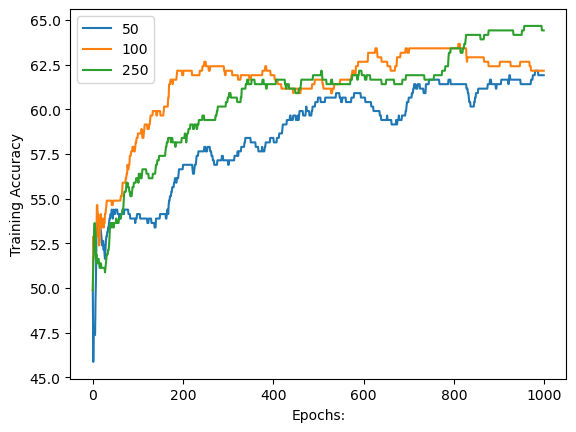

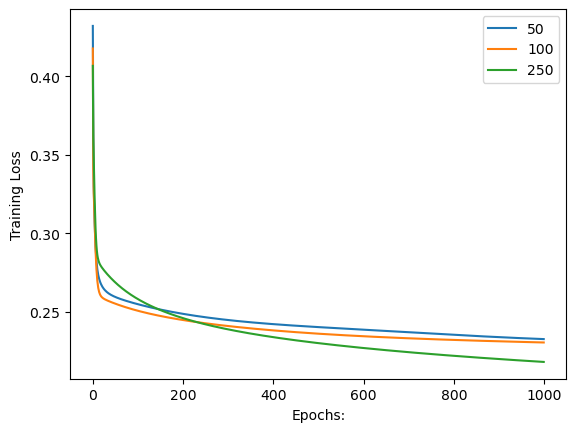

Testing Accuracies:  [[46.365914786967416, 50], [47.86967418546366, 100], [52.63157894736842, 250]]


In [348]:

def train_and_test(filepath_train, filepath_test, HIDDEN_UNITS, ALPHA, EPOCHS):
    print("Training on ", filepath_train, " and testing with ", filepath_test)
    print("Hidden Units: ", HIDDEN_UNITS, " | STEP SIZE: ", ALPHA, " | EPOCHS: ", EPOCHS)
    
    x,Y = load_data(filepath_train) # load test data
   
    # initialize network
    w1 = generate_weights(5, HIDDEN_UNITS)
    b1 = generate_biases(HIDDEN_UNITS)
    w2 = generate_weights(HIDDEN_UNITS, 2)
    b2 = generate_biases(2)

    STEP_SIZE = ALPHA
    EPOCH = EPOCHS

    # do training
    acc, loss1, w1, w2, b1, b2 = train(x, y, w1, w2, b1, b2, STEP_SIZE, EPOCH)

    # do testing
    x,Y = load_data(filepath_test) # load test data
    acc_test = test(x,Y,w1,w2,b1,b2)

    return acc, loss1, acc_test

# TESTING SETUP
accs = []
losses = []
acc_tests = []

acc, loss1, acc_test = train_and_test("train2.csv", "test2.csv", 50, 0.001, 1000)
accs.append(acc)
losses.append(loss1)
acc_tests.append([acc_test, 50])
acc, loss1, acc_test = train_and_test("train2.csv", "test2.csv", 100, 0.001, 1000)
accs.append(acc)
losses.append(loss1)
acc_tests.append([acc_test, 100])
acc, loss1, acc_test = train_and_test("train2.csv", "test2.csv", 250, 0.001, 1000)
accs.append(acc)
losses.append(loss1)
acc_tests.append([acc_test, 250])

# plotting accuracy
for i in accs:
    plt.plot(i)
plt.ylabel('Training Accuracy')
plt.xlabel("Epochs:")
plt.legend([50, 100, 250])
plt.show()
 
# plotting Loss
for i in losses:
    plt.plot(i)
plt.ylabel('Training Loss')
plt.xlabel("Epochs:")
plt.legend([50, 100, 250])
plt.show()

# testing results
print("Testing Accuracies: ", acc_tests)